In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

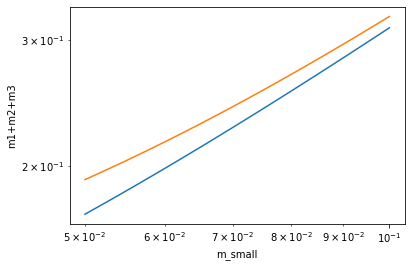

In [2]:
def v_masses(m_small, normal):
    delta_m21_sq = .0000750
    delta_m31_sq = 0.002458
    if normal:
        m1 = m_small
        m2_sq = delta_m21_sq + m1**2
        m3_sq = delta_m31_sq +m1**2
        m2 = np.sqrt(m2_sq)
        m3 = np.sqrt(m3_sq)
    else:
        m3 = m_small
        m1_sq = m3**2 + delta_m31_sq
        m2_sq = delta_m21_sq + m1_sq
        m1 = np.sqrt(m1_sq)
        m2 = np.sqrt(m2_sq)
        
    return m1,m2,m3

small_m = np.linspace(0.05,0.1,100)
neutrino_masses_t = np.zeros(len(small_m))
for i in range(len(small_m)):
    neutrino_masses_t[i] = v_masses(small_m[i],True)[0] + v_masses(small_m[i],True)[1] + v_masses(small_m[i],True)[2]
neutrino_masses_f = np.zeros(len(small_m))
for i in range(len(small_m)):
    neutrino_masses_f[i] = v_masses(small_m[i],False)[0] + v_masses(small_m[i],False)[1] + v_masses(small_m[i],False)[2]

    
    
plt.figure()
plt.loglog(small_m,neutrino_masses_t)
plt.loglog(small_m,neutrino_masses_f)
plt.xlabel('m_small')
plt.ylabel('m1+m2+m3')
plt.show()



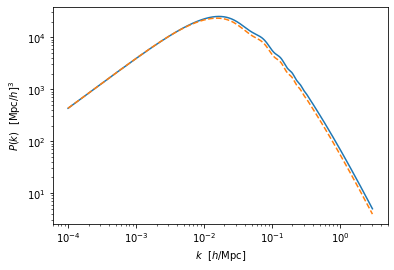

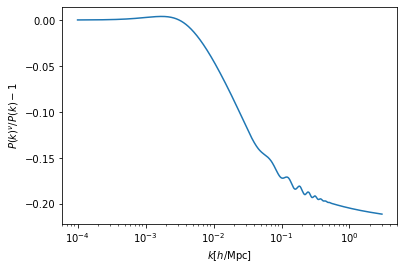

{'age': 13.772631798450417, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.2539210467060358, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.30988279583594536, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900631216258057, 'Omega_m': 0.30988279583594536, 'Omega_r': 5.408253824886603e-05, 'rs_drag': 147.90119233872787, 'Sigma8': 0.7484131455727502, 'Sigma8_cb': 0.7640567623810172, 'T_cmb': 2.7255, 'theta_s_100': 1.0465805107255384, 'theta_star_100': 1.0489730576175678, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [3]:
LambdaCDM_settings = {'omega_b':0.0223828,
                     #'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                      'Omega_m':0.309883043,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1
                    }



LambdaCDM = Class()
LambdaCDM.set(LambdaCDM_settings)
LambdaCDM.compute()



kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

for i,k in enumerate(kk):
    Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)


def v_masses_new(m_small, normal, filename):
    
    v_masses(m_small,normal)
    
    m1,m2,m3 = v_masses(m_small,normal)
    
    
    neutrino_mass_settings = {'N_ur':0.00441,
                              'N_ncdm':3,
                              'm_ncdm':'{},{},{}'.format(m1,m2,m3)     
                             }

    neutrino = Class()
    neutrino.set(LambdaCDM_settings)
    neutrino.set(neutrino_mass_settings)
    neutrino.compute()

    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_neutrino = np.zeros(len(kk))

    for i,k in enumerate(kk):
        Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)


    plt.figure()
    plt.loglog(kk,Pk_LambdaCDM)
    plt.loglog(kk,Pk_neutrino,linestyle='--')
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.show()


    plt.figure()
    plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
    plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k)^\nu/P(k)-1$')
    plt.show()
    
    
    
    def dict_results(spectrum):
        Dict_S = {'age': spectrum.age(),
            'Neff': spectrum.Neff(),
            'omega_b': spectrum.omega_b(),
            'Omega0_cdm':spectrum.Omega0_cdm(),
            'h':spectrum.h(),
            'Omega0_k':spectrum.Omega0_k(),
            'Omega0_m': spectrum.Omega0_m(),
            'Omega_b': spectrum.Omega_b(),
            'Omega_g': spectrum.Omega_g(),
            'Omega_lambda': spectrum.Omega_Lambda(),
            'Omega_m': spectrum.Omega_m(),
            'Omega_r': spectrum.Omega_r(),
            'rs_drag': spectrum.rs_drag(),
            'Sigma8': spectrum.sigma8(),
            'Sigma8_cb': spectrum.sigma8_cb(),
            'T_cmb': spectrum.T_cmb(),
            'theta_s_100': spectrum.theta_s_100(),
            'theta_star_100': spectrum.theta_star_100(),  
            'n_s':spectrum.n_s(),
            'tau_reio':spectrum.tau_reio()
             }
        return Dict_S
    dict_n = dict_results(neutrino)
    print(dict_n)
    
    
    np.savez(filename, n_results = dict_n, k_n_array = kk, Pk_n_array = Pk_neutrino, truth_value = normal, v1 = m1, v2 = m2, v3 = m3, small_mass = m_small, sum_n = m1+m2+m3)
    
    
v_masses_new(0.1,True,"normal hierarchy")



In [4]:
def dict_results(spectrum):
    Dict_S = {'age': spectrum.age(),
        'Neff': spectrum.Neff(),
        'omega_b': spectrum.omega_b(),
        'Omega0_cdm':spectrum.Omega0_cdm(),
        'h':spectrum.h(),
        'Omega0_k':spectrum.Omega0_k(),
        'Omega0_m': spectrum.Omega0_m(),
        'Omega_b': spectrum.Omega_b(),
        'Omega_g': spectrum.Omega_g(),
        'Omega_lambda': spectrum.Omega_Lambda(),
        'Omega_m': spectrum.Omega_m(),
        'Omega_r': spectrum.Omega_r(),
        'rs_drag': spectrum.rs_drag(),
        'Sigma8': spectrum.sigma8(),
        'Sigma8_cb': spectrum.sigma8_cb(),
        'T_cmb': spectrum.T_cmb(),
        'theta_s_100': spectrum.theta_s_100(),
        'theta_star_100': spectrum.theta_star_100(),  
        'n_s':spectrum.n_s(),
        'tau_reio':spectrum.tau_reio()
         }
    return Dict_S

In [5]:
dict_L = dict_results(LambdaCDM)
print(dict_L)

{'age': 13.770597734386017, 'Neff': 3.0439999999999996, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.26120569320189113, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.30988304299999997, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900259955434282, 'Omega_m': 0.30988304299999997, 'Omega_r': 9.09614565717917e-05, 'rs_drag': 147.0713812119375, 'Sigma8': 0.8250557328997786, 'Sigma8_cb': 0.8250557328997786, 'T_cmb': 2.7255, 'theta_s_100': 1.0417962008057993, 'theta_star_100': 1.044143728485429, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


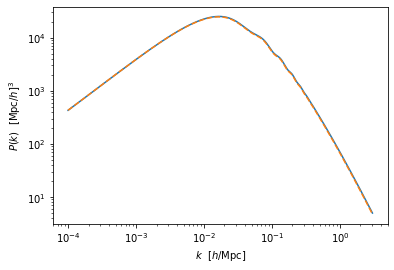

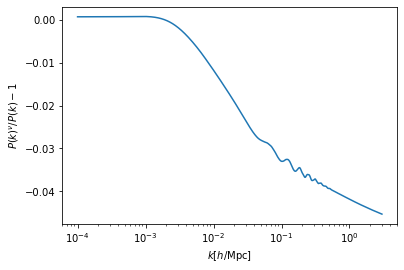

{'age': 13.77196632583692, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.25981671662117073, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.3098753334831469, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900631216258057, 'Omega_m': 0.3098753334831469, 'Omega_r': 6.154489104733506e-05, 'rs_drag': 147.2353153869482, 'Sigma8': 0.8108250155519592, 'Sigma8_cb': 0.8143096057951137, 'T_cmb': 2.7255, 'theta_s_100': 1.042546659366923, 'theta_star_100': 1.0449034080341413, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [15]:
v_masses_new(0.001,True,"mass 1 normal hierarchy")

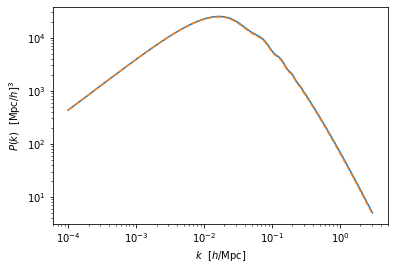

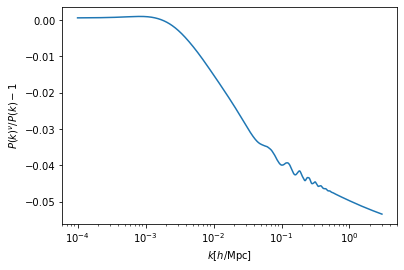

{'age': 13.77228103798856, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.25948160623445055, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.3098813786461295, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900631216258057, 'Omega_m': 0.3098813786461295, 'Omega_r': 5.54997280647003e-05, 'rs_drag': 147.2755879544897, 'Sigma8': 0.8078545763409009, 'Sigma8_cb': 0.8121935702219295, 'T_cmb': 2.7255, 'theta_s_100': 1.042709269737657, 'theta_star_100': 1.0450681236377273, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [12]:
v_masses_new(0.01,True,"mass 3 normal hierarchy")

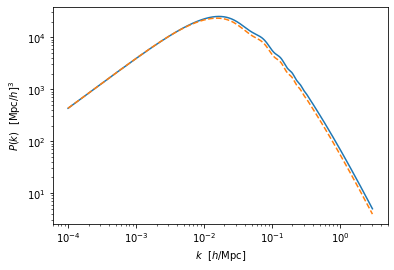

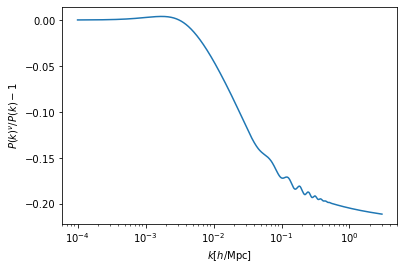

{'age': 13.772631798450417, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.2539210467060358, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.30988279583594536, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900631216258057, 'Omega_m': 0.30988279583594536, 'Omega_r': 5.408253824886603e-05, 'rs_drag': 147.90119233872787, 'Sigma8': 0.7484131455727502, 'Sigma8_cb': 0.7640567623810172, 'T_cmb': 2.7255, 'theta_s_100': 1.0465805107255384, 'theta_star_100': 1.0489730576175678, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [14]:
v_masses_new(0.1,True,"mass 2 normal hierarchy")